# 方程式の数値解法

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import sympy as symp

import matplotlib.pyplot as plt
%matplotlib inline

### 例：計算順序の影響
方程式 $ (x-a)^2 = b $ の解は $x = a \pm \sqrt{b}$である。

In [2]:
a = np.float32(1000.)
b = np.float32(10**(-8))
print(type(a), type(b), type(np.sqrt(b)))

<class 'numpy.float32'> <class 'numpy.float32'> <class 'numpy.float32'>


In [3]:
x1 = (2*a + np.sqrt((2*a)**2 - 4*(a**2-b)))/2
x2 = (2*a + np.sqrt( ((2*a)**2 - 4*(a**2)) + 4*b))/2
x3 = a + np.sqrt(b)
print(x1,x2, x3)

1000.0001000585712 1000.0000999999997 1000.0001


#### numpy.roots()
https://numpy.org/doc/stable/reference/generated/numpy.roots.html<br>
解のアルゴリズムは同伴行列を用いた反復法

In [4]:
np.roots([1.0, -2*a,  a**2-b])

array([1000.00010006,  999.99989994])

#### ニュートン法
https://en.wikipedia.org/wiki/Newton's_method<br>
https://ja.wikipedia.org/wiki/ニュートン法

In [5]:
def newton_method(f, df, x0, eps):
    for i in range(1, 100):
        x = x0 - f(x0)/df(x0)
        print(i, x)
        if abs(x - x0) < eps:break #収束判定
        x0 = x      
    return x0, i

### 簡単な例:
$$ x^2 - 9 = 0$$

In [6]:
def f1(x): # 関数
    return x*x - 9.0
 
def df1(x): # 導関数
    return 2.0*x

eps = 1.e-4 # 収束判定に用いる許容誤差
x0  = 1.0  # 初期値
x , i = newton_method(f1, df1, x0, eps)
print('Solution = ',x ,' The number of iteration =', i, ")") 

1 5.0
2 3.4
3 3.023529411764706
4 3.00009155413138
5 3.000000001396984
Solution =  3.00009155413138  The number of iteration = 5 )


### 例：収束しない例
$$
f(x) = 3 \tan ^{-1}(x-1) + \frac{x}{4} = 0
$$
初めに，$f(x)$の微分をSymPyを用いて求める。

In [10]:
X = symp.Symbol('X')
expr = 3*symp.atan(X-1) + X/4
symp.diff(expr, X)

1/4 + 3/((X - 1)**2 + 1)

#### 初期値2.5は収束，3.0は収束しない

In [11]:
def f2(x):
    return 3*np.arctan(x-1) + x/4

def df2(x):
    return 3/((x-1)**2+1) +1/4

eps = 1.e-4 # 収束判定に用いる許容誤差
x0  = 2.5  # 初期値
x , i = newton_method(f2, df2, x0, eps)
print('Solution = ',x ,' The number of iteration =', i, ")") 

1 -0.5461609971571035
2 2.2090842348709185
3 0.03585045718760327
4 1.3061065733388568
5 0.8992625712186761
6 0.922984253294827
7 0.9229366039525206
Solution =  0.922984253294827  The number of iteration = 7 )


#### 関数のプロット

Text(0, 0.5, 'f(x)')

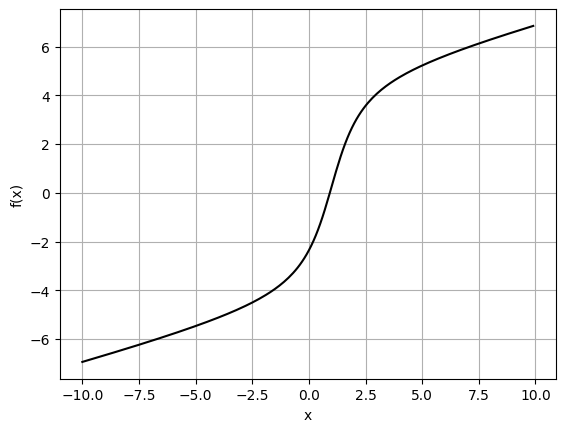

In [12]:
xx = np.arange(-10, 10, 0.1)
yy = f2(xx)
plt.plot(xx, yy, c='k')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')

#plt.savefig('fig_NC_EquationFx.png', bbox_inches='tight')